# Pipeline Project

You will be using the provided data to create a machine learning model pipeline.

You must handle the data appropriately in your pipeline to predict whether an
item is recommended by a customer based on their review.
Note the data includes numerical, categorical, and text data.

You should ensure you properly train and evaluate your model.

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target/

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

## Load Data

In [1]:
import pandas as pd

# Load data
df = pd.read_csv(
    'data/reviews.csv',
)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


## Preparing features (`X`) & target (`y`)

In [2]:
data = df

# separate features from labels
X = data.drop(columns=['Recommended IND', 'Title'], axis=1)
y = data['Recommended IND'].copy()

print('Labels:', y.unique())
print('Features:')
display(X.head())

Labels: [0 1]
Features:


,Clothing ID,Age,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
1,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants
2,847,47,This shirt is very flattering to all due to th...,6,General,Tops,Blouses
3,1080,49,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses
4,858,39,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits


In [3]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=27,
)

In [4]:
# Ensure X_train and X_test are writable
X_train = X_train.copy()
X_test = X_test.copy()

# Your Work

## Data Exploration

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(df.describe())


Summary Statistics for Numerical Columns:
        Clothing ID           Age  Positive Feedback Count  Recommended IND
count  18442.000000  18442.000000             18442.000000     18442.000000
mean     954.896757     43.383635                 2.697484         0.816235
std      141.571783     12.246264                 5.942220         0.387303
min        2.000000     18.000000                 0.000000         0.000000
25%      863.000000     34.000000                 0.000000         1.000000
50%      952.000000     41.000000                 1.000000         1.000000
75%     1078.000000     52.000000                 3.000000         1.000000
max     1205.000000     99.000000               122.000000         1.000000


In [7]:
# Unique values in categorical columns
print("Number of unique Clothing IDs:", df['Clothing ID'].nunique())
print("Division Name:", df['Division Name'].unique())
print("Department Name:", df['Department Name'].unique())
print("Class Name:", df['Class Name'].unique())

Number of unique Clothing IDs: 531
Division Name: ['General' 'General Petite']
Department Name: ['Dresses' 'Bottoms' 'Tops' 'Jackets' 'Trend' 'Intimate']
Class Name: ['Dresses' 'Pants' 'Blouses' 'Knits' 'Outerwear' 'Sweaters' 'Skirts'
 'Fine gauge' 'Jackets' 'Trend' 'Lounge' 'Jeans' 'Shorts' 'Casual bottoms']


C:\Users\JKalt\AppData\Local\Temp\ipykernel_19984\3041586644.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Recommended IND', data=df, palette='viridis')


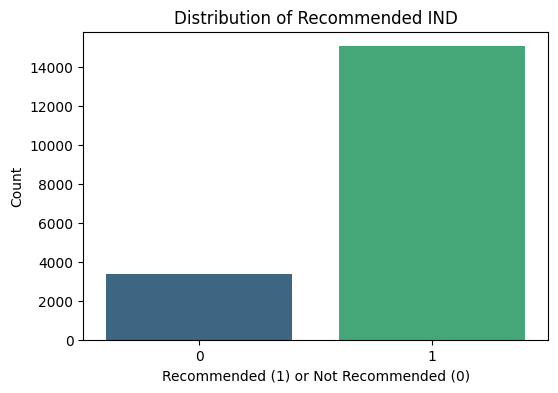

In [8]:
# Distribution of the target variable (Recommended IND)
plt.figure(figsize=(6, 4))
sns.countplot(x='Recommended IND', data=df, palette='viridis')
plt.title('Distribution of Recommended IND')
plt.xlabel('Recommended (1) or Not Recommended (0)')
plt.ylabel('Count')
plt.show()

C:\Users\JKalt\AppData\Local\Temp\ipykernel_19984\1753076360.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Division Name', data=df, palette='viridis')


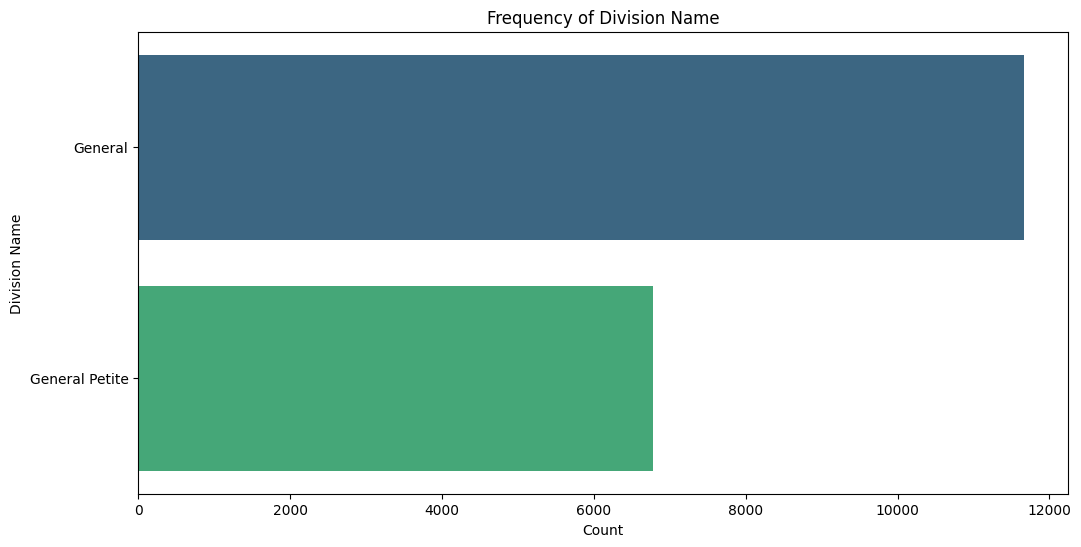

In [9]:
# Frequency of categorical features
plt.figure(figsize=(12, 6))
sns.countplot(y='Division Name', data=df, palette='viridis')
plt.title('Frequency of Division Name')
plt.xlabel('Count')
plt.ylabel('Division Name')
plt.show()

C:\Users\JKalt\AppData\Local\Temp\ipykernel_19984\1785890002.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Department Name', data=df, palette='viridis')


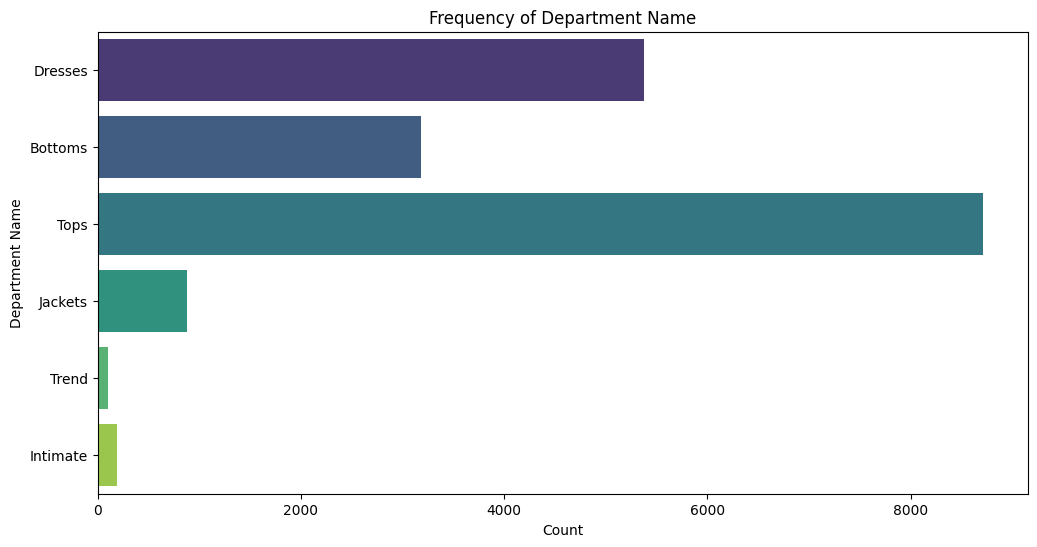

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Department Name', data=df, palette='viridis')
plt.title('Frequency of Department Name')
plt.xlabel('Count')
plt.ylabel('Department Name')
plt.show()

C:\Users\JKalt\AppData\Local\Temp\ipykernel_19984\3027196233.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Class Name', data=df, palette='viridis')


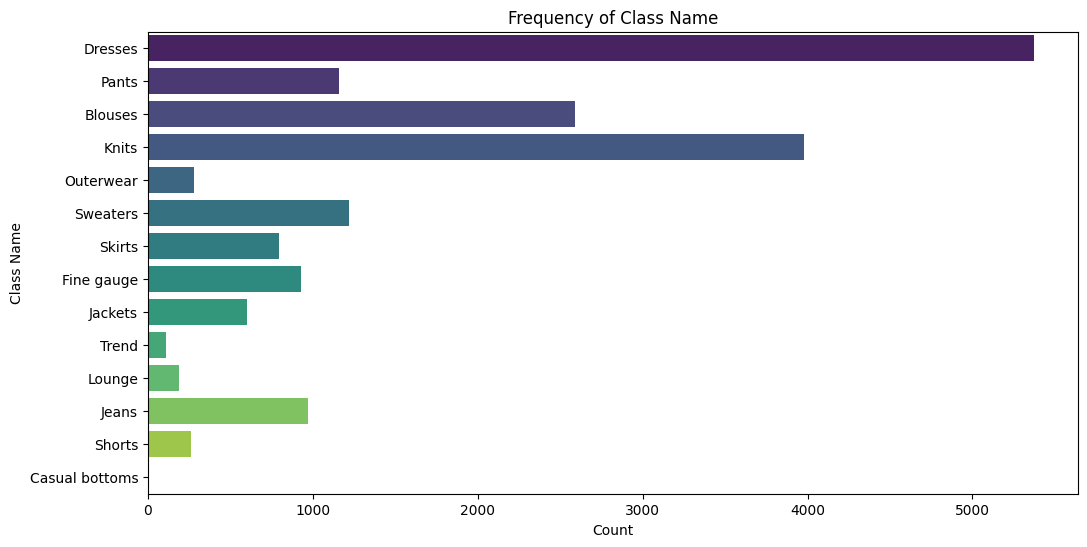

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Class Name', data=df, palette='viridis')
plt.title('Frequency of Class Name')
plt.xlabel('Count')
plt.ylabel('Class Name')
plt.show()

## Building Pipeline

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import spacy
import numpy as np

# Load spaCy model
nlp = spacy.load("en_core_web_lg")  # Ensure this model is downloaded: python -m spacy download en_core_web_lg

# Define Spacy Lemmatizer Transformer
class SpacyLemmatizer(BaseEstimator, TransformerMixin):
    def __init__(self, nlp):
        self.nlp = nlp
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        lemmatized = [
            ' '.join(token.lemma_ for token in doc if not token.is_stop)
            for doc in self.nlp.pipe(X)
        ]
        return lemmatized

# Define the TF-IDF pipeline
tfidf_pipeline = Pipeline([
    ('dimension_reshaper', FunctionTransformer(np.reshape, kw_args={'newshape': -1})),
    ('lemmatizer', SpacyLemmatizer(nlp=nlp)),
    ('tfidf_vectorizer', TfidfVectorizer(stop_words='english')),
])

# Define ColumnTransformer for feature engineering
preprocessor = ColumnTransformer([
    ('categorical', OneHotEncoder(handle_unknown='ignore'), ['Division Name', 'Department Name', 'Class Name']),
    ('text', tfidf_pipeline, 'Review Text')
], remainder='passthrough')

## Training Pipeline

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the full pipeline including preprocessing and model
model_pipeline = Pipeline([
    ('preprocessing', preprocessor),  # ColumnTransformer for categorical and text data
    ('classifier', RandomForestClassifier(random_state=42))  # Classifier (RandomForest)
])

# Fit the model
model_pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = model_pipeline.predict(X_test)

In [14]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.846070460704607
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.19      0.31       327
           1       0.85      0.99      0.91      1518

    accuracy                           0.85      1845
   macro avg       0.80      0.59      0.61      1845
weighted avg       0.83      0.85      0.81      1845



## Fine-Tuning Pipeline

In [ ]:
from sklearn.model_selection import HalvingRandomSearchCV

param_rand = dict(
    classifier__max_features=[100, 150, 250],
    classifier__n_estimators=[150, 200],
)

param_search = HalvingRandomSearchCV(
    estimator=model_pipeline,
    param_distributions=param_rand,
    factor=2,  # Halves the number of candidates each iteration
    cv=3,  # Reduce memory usage
    verbose=1,
    random_state=27,
    n_jobs=1
)

param_search.fit(X_train, y_train)

# Retrieve the best parameters
model_best = param_search.best_estimator_

In [17]:
y_pred = model_best.predict(X_test)
accuracy_forest_pipeline = accuracy_score(y_test, y_pred)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.8542005420054201
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.27      0.40       327
           1       0.86      0.98      0.92      1518

    accuracy                           0.85      1845
   macro avg       0.80      0.62      0.66      1845
weighted avg       0.84      0.85      0.82      1845

